# A Deep Learning model for Credit Card Fraud Detection using Keras

This dataset contains the LendingClub data available from their site, 2007 through current Lending Club accepted and rejected loan data. The data is a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform


----
-----
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Keras API is packaged inside Tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Explarotay Analysis, Data Visualization

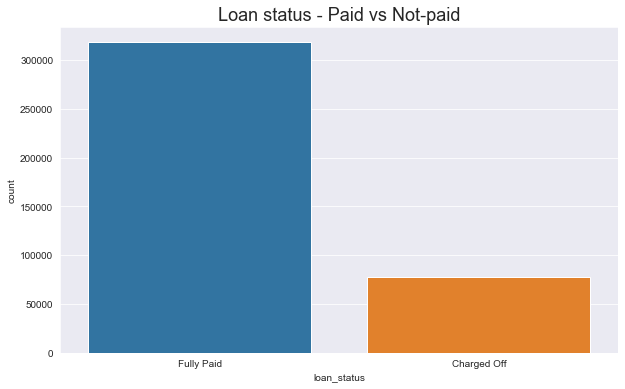

In [6]:
plt.figure(figsize=(10,6))
plt.title('Loan status - Paid vs Not-paid', fontsize=18)
sns.countplot(x='loan_status', data=df)

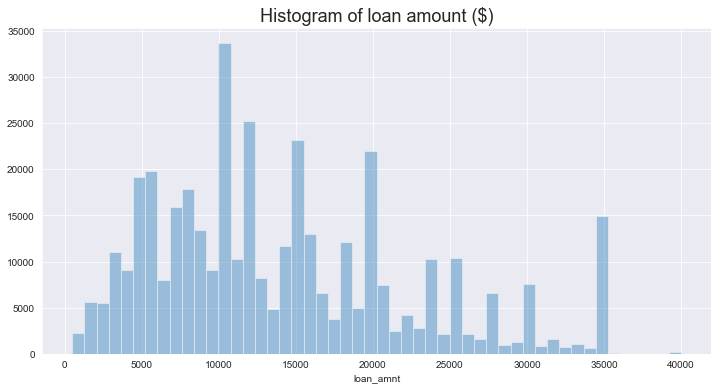

In [7]:
plt.figure(figsize=(12,6))
plt.title('Histogram of loan amount ($)', fontsize=18)
sns.distplot(df['loan_amnt'], kde=False)

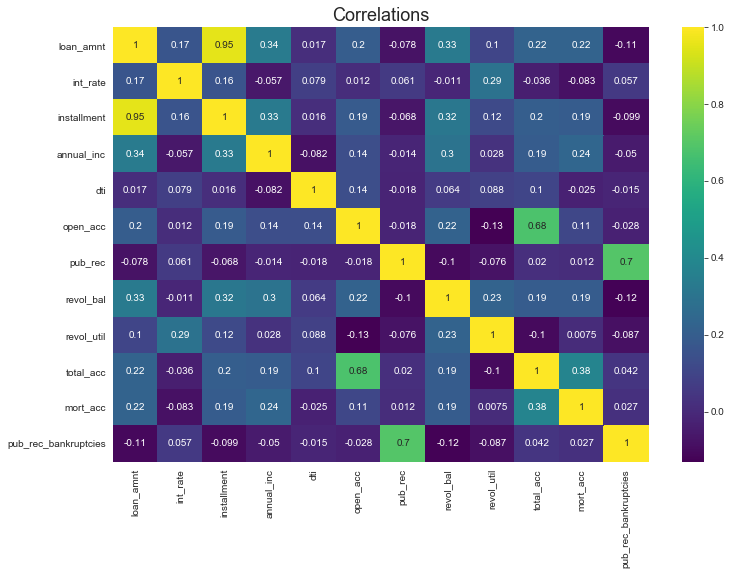

In [8]:
plt.figure(figsize=(12,8))
plt.title('Correlations', fontsize=18)
sns.heatmap(df.corr(), cmap='viridis', annot=True)

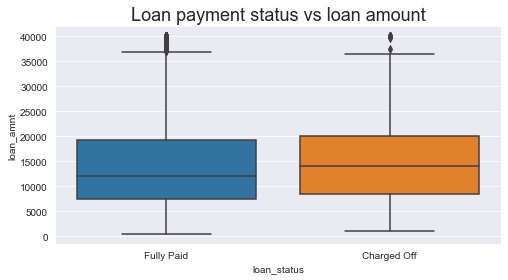

In [9]:
plt.figure(figsize=(8,4))
plt.title('Loan payment status vs loan amount', fontsize=18)
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [10]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


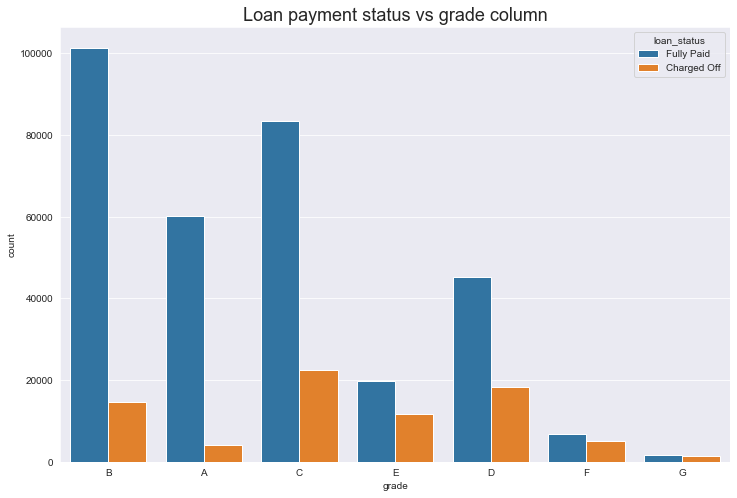

In [11]:
plt.figure(figsize=(12,8))
plt.title('Loan payment status vs grade column', fontsize=18)
sns.countplot(x='grade', data=df, hue='loan_status')

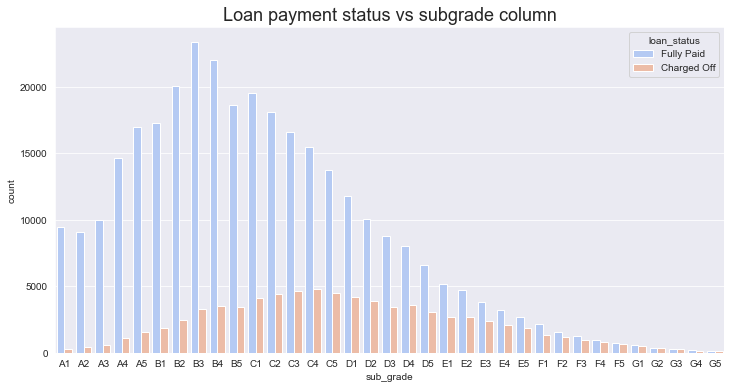

In [12]:
plt.figure(figsize=(12,6))
plt.title('Loan payment status vs subgrade column', fontsize=18)
sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()), hue='loan_status', palette='coolwarm')

In [13]:
# Mapping numerical values (0 and 1) to loan payment status
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

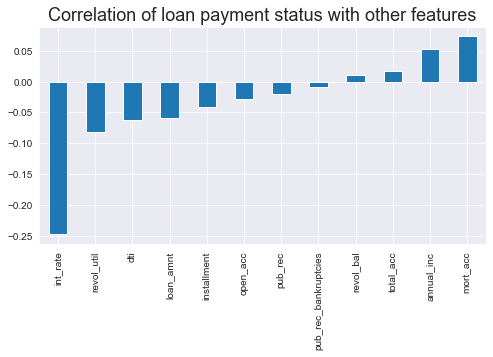

In [14]:
plt.figure(figsize=(8,4))
plt.title('Correlation of loan payment status with other features', fontsize=18)
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

# Feature Engineering

In [15]:
# Fraction of missing data per feature
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

##### emp_title, emp_length, and mort_acc have the most missing values. We'll explore them 

In [16]:
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
Child care directot                  1
Settlement Closer                    1
Lighthouse Nursing Care Center       1
Senior FRS                           1
 AFJROTC Teacher                     1
Name: emp_title, Length: 173105, dtype: int64

##### There are 173105 different 'emp_title' types, too many to be categorized. We will drop this feature

In [17]:
df.drop('emp_title', axis=1, inplace=True)

In [18]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

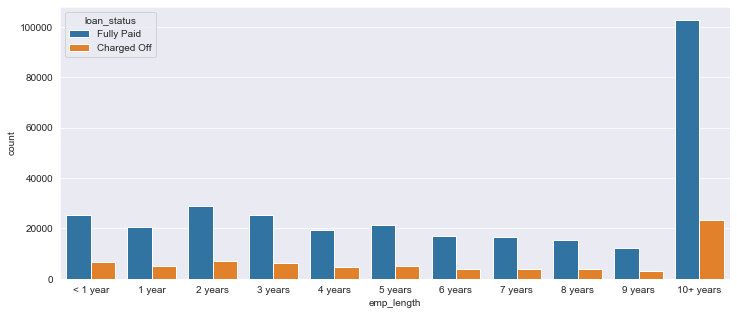

In [19]:
emp_length_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status' )

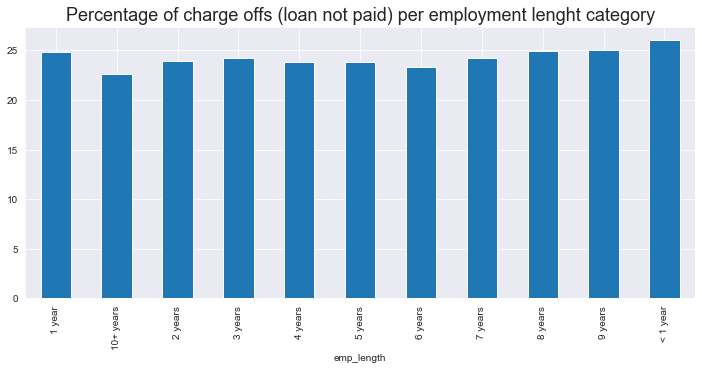

In [20]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_len = (emp_co/emp_fp)*100

plt.figure(figsize=(12,5))
plt.title('Percentage of charge offs (loan not paid) per employment lenght category', fontsize=18)
emp_len.plot(kind='bar')

##### employment lenght doesn't seem to correlate well with loan payment status and has high number of missing values. We'll drop this feature

In [21]:
df = df.drop('emp_length',axis=1)

In [22]:
df['title'].value_counts()

Debt consolidation                152472
Credit card refinancing            51487
Home improvement                   15264
Other                              12930
Debt Consolidation                 11608
                                   ...  
medical bills loan                     1
The Loan to Becoming Debt Free         1
ConsolidateToZero                      1
start a businnes                       1
roof and credit cards                  1
Name: title, Length: 48817, dtype: int64

In [23]:
df = df.drop('title',axis=1) # too many title types to be categorized. We will drop this feature

In [24]:
df.corr()['mort_acc'].sort_values()[:-1]

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

##### mort_acc has high number of missing values and is most correlated with the total_acc feature. We will fill the missing values in mort_acc based on the total_acc

In [25]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [26]:
tota_acc_ave = df.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(total_acc):
        return tota_acc_ave(mort_acc)
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [27]:
df['revol_util'].dropna(inplace=True)
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## One-hot encoding of the categorical features (using dummy variables)

In [29]:
df.select_dtypes(['object']).columns #  all the column names that are categorical

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [30]:
df['term'].value_counts()

 36 months    273605
 60 months     84409
Name: term, dtype: int64

In [31]:
df['term'] = df['term'].apply(lambda x: int(x[0:3]))
df['term'].value_counts()

36    273605
60     84409
Name: term, dtype: int64

In [32]:
df.drop('grade',axis=1,inplace=True) # Redundant information - grade is included in the sub_grade feature

In [33]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
subgrade_dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [35]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']], drop_first=True)
df = df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [36]:
df['home_ownership'].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           34
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [37]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           66
Name: home_ownership, dtype: int64

In [38]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [39]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [40]:
df['zip_code'] = df['address'].apply(lambda text: text[-5:])
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [41]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)
df.drop('address',axis=1,inplace=True)

In [42]:
df.drop('issue_d', axis=1, inplace=True) # It has information about loan paid of not-paid status - data leakage

In [43]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [44]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda text: int(text[-4:]))
df.drop('earliest_cr_line',axis=1, inplace=True)
df['earliest_cr_year'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64

In [45]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

##### Now we have converted all categorical columns to dummy variables - The only categorical column left is loan_status, which will be the model's prediction column - We already have converted the loan_status to numerical values (0 or 1) in the loan_repaid column. So we'll drop the loan_status

In [46]:
df.drop('loan_status',axis=1,inplace=True)

In [47]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [48]:
print(len(df))

358014


# Spliting Train/Test Data

In [49]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Fit based on X_train and transform X_train using that scale in one step
X_test = scaler.transform(X_test)

In [52]:
X_train.shape

(286411, 78)

# Trainig a Deep Learning Neural Network Model

In [53]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(1, activation='sigmoid'))

# 'loan_repaid' is binary 0 or 1 output
model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
# Prevent overfitting
# Stops trainig when a certain critera is met
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# We want to minimize the loss, so we choose mode='min'
# Patience = how many epochs to wait before stopping the training

In [55]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
         callbacks=[early_stop], epochs=25, batch_size=256)

Train on 286411 samples, validate on 71603 samples
Epoch 1/25
286411/286411 [==============================] - 4s 15us/sample - loss: 0.3071 - val_loss: 0.2692
Epoch 2/25
286411/286411 [==============================] - 4s 13us/sample - loss: 0.2700 - val_loss: 0.2661
Epoch 3/25
286411/286411 [==============================] - 3s 12us/sample - loss: 0.2673 - val_loss: 0.2653
Epoch 4/25
286411/286411 [==============================] - 4s 14us/sample - loss: 0.2659 - val_loss: 0.2660
Epoch 5/25
286411/286411 [==============================] - 4s 13us/sample - loss: 0.2650 - val_loss: 0.2655
Epoch 6/25
286411/286411 [==============================] - 4s 13us/sample - loss: 0.2644 - val_loss: 0.2651
Epoch 7/25
286411/286411 [==============================] - 4s 13us/sample - loss: 0.2637 - val_loss: 0.2644
Epoch 8/25
286411/286411 [==============================] - 4s 13us/sample - loss: 0.2634 - val_loss: 0.2645
Epoch 9/25
286411/286411 [==============================] - 4s 12us/sample - 

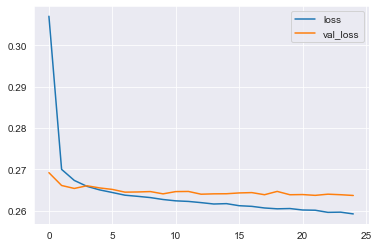

In [56]:
pd.DataFrame(model.history.history).plot()

In [57]:
from tensorflow.keras.models import load_model
model.save('LendingClub_ANN.h5')

# Evaluating the Deep Learning model

In [58]:
predictions = model.predict_classes(X_test)

In [59]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     14385
           1       0.88      1.00      0.93     57218

    accuracy                           0.89     71603
   macro avg       0.92      0.72      0.77     71603
weighted avg       0.90      0.89      0.87     71603



[[ 6358  8027]
 [  186 57032]]


#### Testing the model on a single data point

In [60]:
import random
rndm_id = random.randint(0,len(df))

In [61]:
new_data = df.drop('loan_repaid',axis=1).iloc[rndm_id]
new_data = scaler.transform(new_data.values.reshape(1,new_data.shape[0]))

In [62]:
model.predict_classes(new_data) # Model predicted value/class

array([[0]])

In [63]:
df.iloc[rndm_id]['loan_repaid'] # Observed value/class

0.0